# Gradient Descent Strategies

Pablo Mollá Chárlez - Machine Learning Algorithms

## Objective

This applied session aims at implementing different gradient descent strategies, using batch, stochastic or minibatch approaches. We will focus on a simple linear regression problem to evaluate each strategies.

## Evaluation

You should **individually** complete this notebook with the requested answers and send it by mail when finished. The deadline will be indicated during class, any late submission will be penalized. 


In [1]:
# add your import here
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import pandas as pd

C:\Users\pmoll\AppData\Local\Temp\ipykernel_23956\1059052784.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Question 1 - Hypothesis function and loss


Consider a collection of $m$ samples ${x^{(i)}}_{i=1}^m$ in $\mathcal{X} \subseteq \mathbb{R}^n$, where $n$ is the number of features for each samples. $X$ is the matrix concatenating the samples, with $X \in \mathbb{R}^{m\times n}$. We aim to predict a value $y^{(i)}$ in $\mathcal{Y} \subseteq \mathbb{R}$ associated with each sample. $Y$ is the vector concatenating all $y$, with $Y \in \mathbb{R}^m$. We restrict ourselves to linear solutions, i.e., our hypothesis is of the form $y^{(i)} = h(x^{(i)})$ with

$$h_{\theta}(x) = \sum_{i=0}^n \theta_i x_i = \theta^T x$$

We could define $H: \mathbb{R}^{m\times n} \mapsto \mathbb{R}^m$ as 

$$ h_{\theta}(X) = X\theta $$

Write the hypothesis function `H(theta, X)`, that takes a parameter vector `theta`, the input matrix `X` and returns a vector of $m$ predicted value. 

In [2]:
def H(theta, X):
    """Compute linear regression prediction with given coefficient
    
    Parameters
    ----------
    theta : ndarray of shape (n,1)
        Coefficients of the linear regression
    X : ndarray of shape (m, n)
        Matrix concatenating m samples of n features
        
    Returns
    -------
    pred : ndarray of shape (m)
        Predicted values for m samples
    """
    return np.dot(X, theta)


We will use the MSE as loss : 

$$\ell(\theta) = \frac{1}{2m}\sum_{j=1}^{m}(h_{\theta}(x^{(j)}) - y^{(j)})^2 $$

that could be rewritten as 

$$L(\theta) = \frac{1}{2m}(X\theta - Y)^T(X\theta - Y)$$

Write the loss function `L(theta, X, Y)` that returns the estimated loss as a scalar value.

In [3]:
def L(theta, X, Y):
    """Estimate loss as mean square error on linear regression prediction
    
    Parameters
    ----------
    theta : ndarray of shape (n)
        Coefficients of the linear regression
    X : ndarray of shape (m, n)
        Matrix concatenating m samples of n features
    Y : ndarray of shape (m)
        Vector of m values to predict
        
    Returns
    -------
    loss : float
        Mean square error computed on a m samples
    """
    m = len(Y)
    predictions = H(theta, X)
    return np.dot((predictions - Y).T, (predictions - Y)) / (2*m)

## Question 2 - Gradient descent strategies

To minimize $L(\theta)$, we will perform a gradient descent, which involves initializing $\theta$ and then updating it using:

$$\theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial\theta_j} = \theta_j - \alpha (h_\theta(x)-y)x_j$$

It could be rewritten as

$$\theta := \theta - \frac{\alpha}{m} (X\theta - Y)^T X$$

Write the update function for batch strategy, defined as `batch_update(theta, X, Y, alpha)`, with $\alpha=0.01$ by default. This function should return a vector with the updated values of `theta`.

In [4]:
def batch_update(theta, X, Y, maxIterations, alpha=0.01):
    """Compute one iteration of the batch update for linear regression coefficients 
    
    Parameters
    ----------
    theta : ndarray of shape (n)
        Coefficients of the linear regression
    X : ndarray of shape (m, n)
        Matrix concatenating m samples of n features
    Y : ndarray of shape (m)
        Vector of m values to predict
    alpha : float, default=0.01
        Gradient step
        
    Returns
    -------
    new_theta : ndarray of shape (n)
        New coefficients after batch update
    """
    m,n = X.shape
    for i in range(maxIterations):
        predictions = H(theta, X)
        errors = predictions - Y
        partial_derivative = np.dot(errors.T, X)
        theta = theta - (alpha/m)*partial_derivative
    return theta


Write the stochastic version of the gradient update, named `stochastic_update(theta, X, Y, alpha)`

In [5]:
def stochastic_update(theta, X, Y, alpha=0.01):
    """Compute one iteration of the stochatiste update for linear regression coefficients
    
    Parameters
    ----------
    theta : ndarray of shape (n)
        Coefficients of the linear regression
    X : ndarray of shape (m, n)
        Matrix concatenating m samples of n features
    Y : ndarray of shape (m)
        Vector of m values to predict
    alpha : float, default=0.01
        Gradient step
        
    Returns
    -------
    new_theta : ndarray of shape (n)
        New coefficients after stochastic update
    """
    maxIterations = 800
    m, n = X.shape
    for iteration in range(maxIterations):
        random_index = np.random.randint(m)
        Xi = X[random_index:random_index+1]
        Yi = Y[random_index:random_index+1]
        predictions = H(theta, Xi)
        errors = predictions - Yi
        theta = theta - alpha * Xi.T.dot(errors)
    return theta

It is also possible to directly derive a solution that minimizes the least squares:

\begin{equation}
\begin{split}
    \nabla_\theta L(\theta) = \nabla_\theta  [ \frac{1}{2}(X\theta - Y)^T(X\theta - Y)] = X^T X \theta - X^T Y = X^T \cdot [X \theta -Y]
\end{split}
\end{equation}

To find the minimum, we look for the point where the derivative is zero:

$$ X^T X \theta = X^T Y$$

and then solve the equation to obtain the value of $\theta$ that minimizes $L(\theta)$:

$$ \theta = (X^T X)^{-1} X^T Y $$

Write the function `normal_equation(X, Y)` that provides directly the value of `theta`

In [6]:
def normal_equation(X, Y):
    """Estimate regression coefficient with the Normal equation
    
    Parameters
    ----------
    X : ndarray of shape (m, n)
        Matrix concatenating m samples of n features
    Y : ndarray of shape (m)
        Vector of m values to predict
        
    Returns
    -------
    theta : ndarray of shape (n)
        Coefficients of the linear regression
    """
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    return theta

## Question 3 - Applications to real estate estimation

To apply linear regression, we will first load a dataset containing information about the prices of 47 houses in Portland, Oregon. The data includes two features:

- The area of the house in square feet (ft$^2$),
- The number of bedrooms.

We also have the selling price of each house. Therefore, for this dataset, with $m=47$ and $n=2$, we have 47 samples $x^{(i)}$ that are described in $\mathbb{R}^2$ (area and number of bedrooms), and we will attempt to predict the price of each house, denoted as $y^{(i)}$.

In [7]:
data = loadtxt('house_x.dat')
Y_orig = loadtxt('house_y.dat')
n = 2
m = data.shape[0]

Plot the input data 

### Plotting Area vs Price

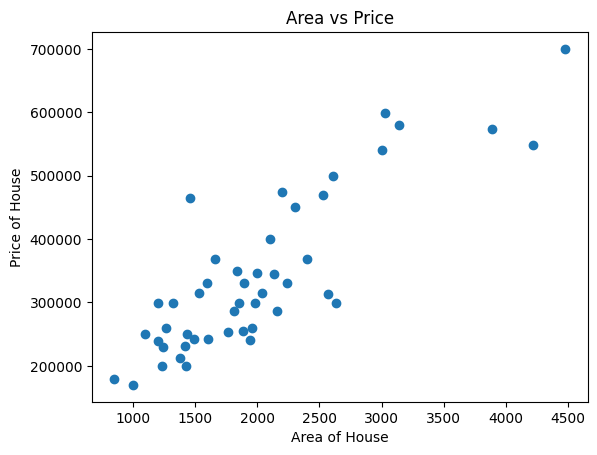

In [8]:
# Plotting Area vs Price
plt.scatter(data[:,0], Y_orig)

# Adding Title and Labels
plt.title('Area vs Price')
plt.xlabel('Area of House')
plt.ylabel('Price of House')

# Showing the plot
plt.show()

In order to avoid size effect and numerical biais, you need to normalize all the data and prediction (both `X` and `Y`). A standard normalization, substracting the mean and dividing by the standard deviation, is the prefered method here. Store the mean and std value to be able to "denormalize" the data before visualization.

### Standard Normalization

In [9]:
mean_X = np.mean(data, axis=0)
std_dev_X = np.std(data, axis=0)
mean_Y = np.mean(Y_orig, axis=0)
std_dev_Y = np.std(Y_orig, axis=0)

X_normalized = (data - mean_X) / std_dev_X
Y_normalized = (Y_orig - mean_Y) / std_dev_Y

### Plotting Area vs Price Normalized

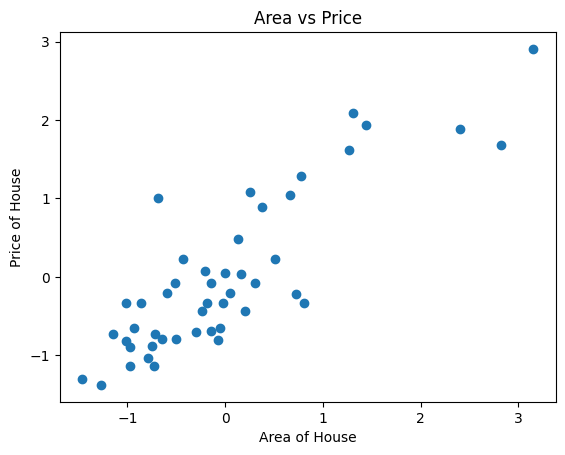

In [10]:
# Normalized: Area vs Price
plt.scatter(X_normalized[:,0], Y_normalized)

# Adding Title and Labels
plt.title('Area vs Price')
plt.xlabel('Area of House')
plt.ylabel('Price of House')

# Showing the plot
plt.show()

Apply batch estimation with $\alpha = 0.005$ and 800 iterations. Initialize `theta` with zero values. Plot the resulting estimation and if possible the intermediate values. You could use only the square footage information for simplifying the visualization.

### Full Batch Gradient Descent applied on Raw Data

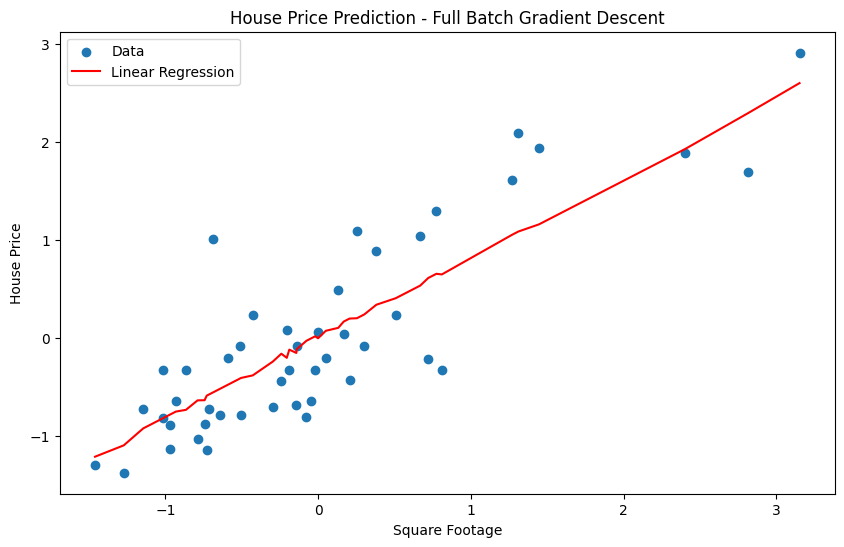

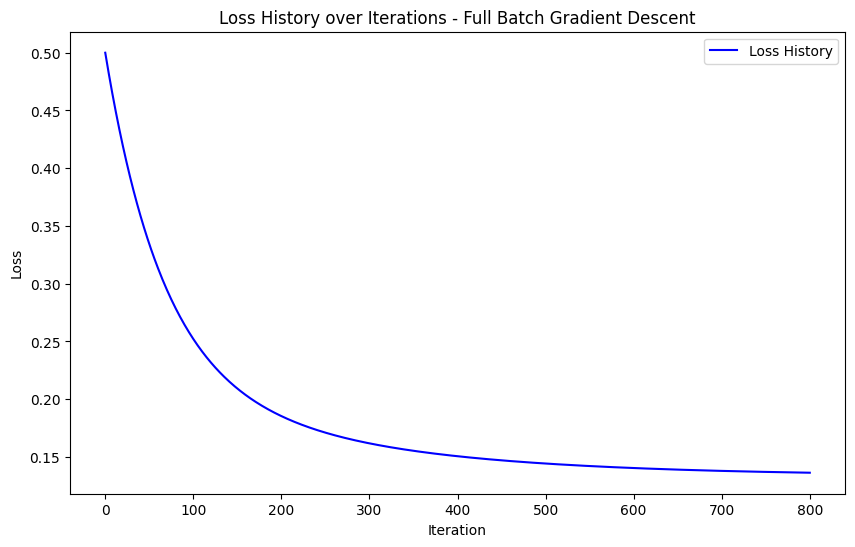

In [11]:
# New batch_update that includes a loss_history list to
# trace all values during the training
def batch_update_2(theta, X, Y, maxIterations, alpha):
    m,n = X.shape
    loss_history = [L(theta, X, Y)]
    for i in range(maxIterations):
        predictions = H(theta, X)
        errors = predictions - Y
        partial_derivative = np.dot(errors.T, X)
        theta = theta - (alpha/m)*partial_derivative
        loss_history.append(L(theta, X, Y))
    return theta, loss_history

# Data Preparation
theta = np.zeros(2)
alpha = 0.005
maxIterations = 800

# Calling the function
theta_batch, loss_history_batch = batch_update_2(theta, X_normalized, Y_normalized, maxIterations, alpha)

# Sorting indices & data & predictions to plot effectively
predictions_batch_house = H(theta_batch, X_normalized)
sorted_indices = np.argsort(X_normalized[:, 0])
sorted_X = X_normalized[sorted_indices, 0]
sorted_predictions_batch_house = predictions_batch_house[sorted_indices]

# Plotting the dataset and the regression line
plt.figure(figsize=(10,6))
plt.scatter(X_normalized[:, 0], Y_normalized, label='Data')
plt.plot(sorted_X, sorted_predictions_batch_house, color='red', label='Linear Regression')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('House Price Prediction - Full Batch Gradient Descent')
plt.legend()
plt.show()


# Plotting the loss history
plt.figure(figsize=(10,6))
plt.plot(loss_history_batch, '-b', label='Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History over Iterations - Full Batch Gradient Descent')
plt.legend()
plt.show()


### Stochastic Gradient Descent applied on Raw Data

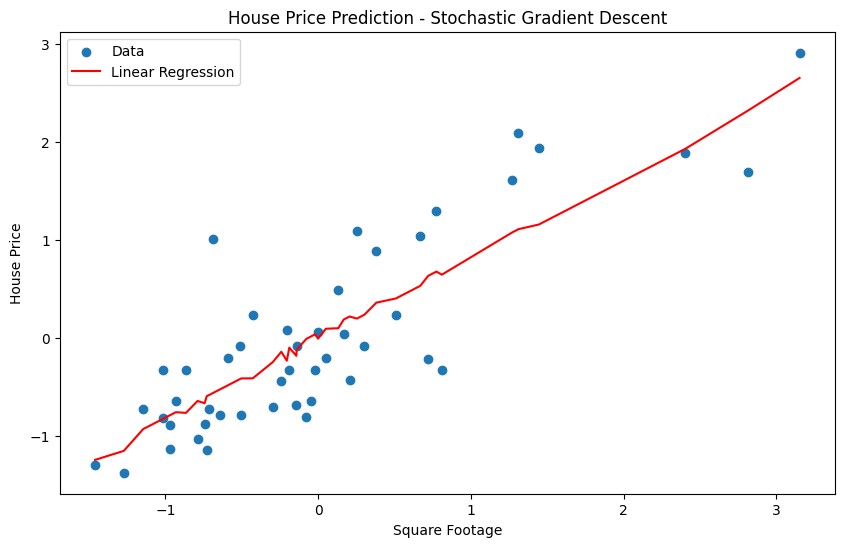

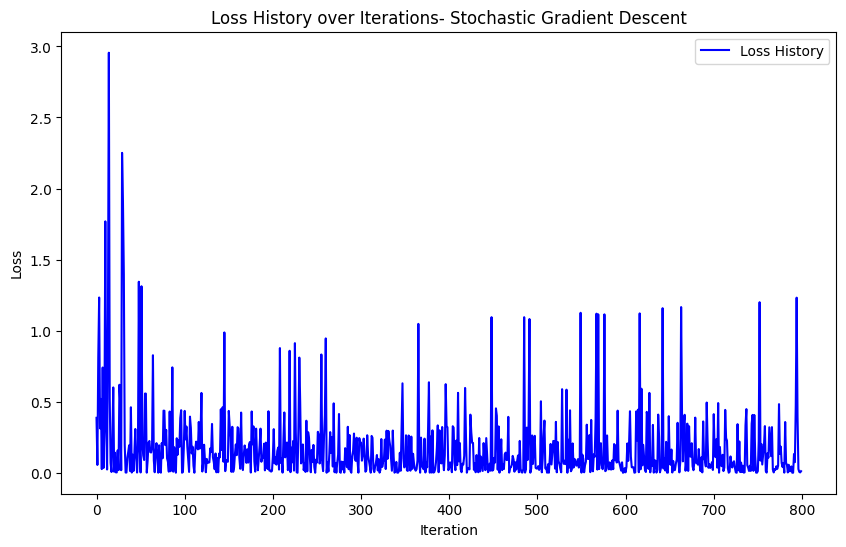

In [12]:
# New batch_update that includes a loss_history list to
# trace all values during the training
def stochastic_update_2(theta, X, Y, alpha, maxIterations):
    loss_history = []
    for iteration in range(maxIterations):

        random_index = np.random.randint(m)
        Xi = X[random_index:random_index+1]
        Yi = Y[random_index:random_index+1]
        predictions = H(theta, Xi)
        errors = predictions - Yi
        theta = theta - alpha * Xi.T.dot(errors)

        loss = L(theta, Xi, Yi)
        loss_history.append(loss)
    
    return theta, loss_history

# Data Preparation
theta = np.zeros(2)
alpha = 0.005
maxIterations = 800

# Calling the function
theta_stochastic, loss_history_stochastic = stochastic_update_2(theta ,X_normalized, Y_normalized, alpha, maxIterations)

# Sorting indices & data & predictions to plot effectively
predictions_stochastic = H(theta_stochastic, X_normalized)
sorted_indices = np.argsort(X_normalized[:, 0])
sorted_X = X_normalized[sorted_indices, 0]
sorted_predictions = predictions_stochastic[sorted_indices]

# Plotting the dataset and the regression line
plt.figure(figsize=(10,6))
plt.scatter(X_normalized[:, 0], Y_normalized, label='Data')
plt.plot(sorted_X, sorted_predictions, color='red', label='Linear Regression')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('House Price Prediction - Stochastic Gradient Descent')
plt.legend()
plt.show()


# Plotting the loss history
plt.figure(figsize=(10,6))
plt.plot(loss_history_stochastic, '-b', label='Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History over Iterations- Stochastic Gradient Descent')
plt.legend()
plt.show()

## Question 4 - Convergence rate

Compare visually the convergence of the stochastic and the batch strategies and comment the results

Based on the two plots that we  provided, one for the full batch gradient descent and the other for the stochastic gradient descent, here are some comments on the convergence of the two strategies:

1. Full Batch Gradient Descent
- The line appears to be smooth, indicating that the updates to `theta` are consistent and stable.
- The convergence looks to be relatively straightforward and smooth, as indicated by the steady progression of the line through the data points towards the best fit.
- The full batch method uses all the data for each update, resulting in a more reliable and direct path towards the minimum loss.

2. Stochastic Gradient Descent
- The line seems to be more jagged, which is typical for stochastic updates since each one is based on a single data point or a small batch. This can cause the updates to be more noisy and less stable.
- Despite the noise, the overall trend seems to be towards the best fit, but it takes a less direct path due to the variance in the updates.
- The stochastic method has more fluctuations, which can sometimes help escape local minima but may require more iterations or a dynamic learning rate to achieve convergence similar to that of the full batch method.

3. Comments on the Results
- The full batch method tends to be more stable and can converge more quickly to the minimum of the cost function if the learning rate is well-tuned.
- The stochastic method can be faster per iteration since it requires less computation per update, but it might need more iterations to converge due to its noisy nature.
- Stochastic updates can potentially navigate complex cost landscapes better than full batch updates because the noise introduced can help to escape from local minima.
- In practice, a combination of both methods, known as mini-batch gradient descent, is especially often used to balance the stability of the full batch updates with the speed and potential benefits of stochastic updates.

Compare the quality of the estimated results obtained by batch and stochastic strategies with the one computed by Normal equation. Comment the results.

In [13]:
print("Stochastic Gradient Descent - Theta:\n   ", theta_stochastic, "\n")
print("Full batch Gradient Descent - Theta:\n   ", theta_batch, "\n")
print("Normal Equation - Theta:\n   ", normal_equation(X_normalized,Y_normalized))

Stochastic Gradient Descent - Theta:
    [0.80563313 0.04524633] 

Full batch Gradient Descent - Theta:
    [0.80345731 0.02654736] 

Normal Equation - Theta:
    [ 0.88476599 -0.05317882]


- **Stochastic Gradient Descent - Theta: [0.80954566 0.02557459]**
  - The parameters obtained from SGD show that the model gives a higher weight to the first feature and a small negative weight to the second feature.
  - The negative value for the second parameter suggests that there is an inverse relationship between the second feature and the dependent variable.
  - The stochastic nature of SGD can lead to parameters that may not be the global optimum but could be close, depending on the variance in the updates.

- **Full Batch Gradient Descent - Theta: [0.80345731 0.02654736]**
  - The parameters obtained from Full Batch Gradient Descent are different from those obtained from SGD. The first parameter is smaller, and the second parameter is positive, indicating a direct relationship between the second feature and the dependent variable.
  - Full Batch Gradient Descent tends to find a more stable and possibly more accurate minimum since it considers the entire dataset for each update.

- **Normal Equation - Theta: [0.88476599 -0.05317882]**
  - The Normal Equation is a closed-form solution and should theoretically give the most accurate parameters if the assumptions of the linear regression are met.
  - The parameters here are quite close to those obtained from SGD, which suggests that SGD did a good job of approximating the best parameters for this dataset.
  - The difference between the Normal Equation and Full Batch Gradient Descent parameters indicates that the gradient descent might not have fully converged, or there might be other factors such as learning rate or feature scaling affecting the convergence.

In summary, the differences between the parameter values obtained from each method are influenced by the nature of the optimization algorithm. The Normal Equation provides a precise solution, while gradient descent methods iteratively approach the solution and are affected by factors like the learning rate, the number of iterations, and the stochasticity of the updates. The results from Full Batch Gradient Descent are more consistent and stable compared to SGD, but they may require more computational resources.

It is common to conduct tests to find a correct value for the gradient step $\alpha$. Evaluate different values of $\alpha$ for batch update with respect to the convergence speed and comment the results. 

In [14]:
# Different learning rates to test
alphas = [0.00001, 0.0001,  0.001, 0.01, 0.1]

# Threshold onvergence value and max_Iterations
convergence_threshold = 0.0001
max_iterations = 1000

def batch_gradient_descent(X, Y, alpha, maxIterations, convergence_threshold):
    m,n = X.shape
    theta = np.zeros(n)
    for iteration in range(maxIterations):
        loss = L(theta, X, Y)
        # Converged
        if loss < convergence_threshold:
            return theta, iteration  
        
        predictions = H(theta, X)
        errors = predictions - Y
        partial_derivative = np.dot(errors.T, X)
        theta = theta - (alpha/m)*partial_derivative

    return theta, maxIterations  # Did not converge within maxIterations


for alpha in alphas:
    theta, iterations_taken = batch_gradient_descent(X_normalized, Y_normalized, alpha, maxIterations, convergence_threshold)
    print(f"Alpha: {alpha}, Iterations taken to converge: {iterations_taken}")


Alpha: 1e-05, Iterations taken to converge: 800
Alpha: 0.0001, Iterations taken to converge: 800
Alpha: 0.001, Iterations taken to converge: 800
Alpha: 0.01, Iterations taken to converge: 800
Alpha: 0.1, Iterations taken to converge: 800


Based on the results where each value of \( \alpha \) took exactly 800 iterations to converge, we can draw a few conclusions:

1. **Convergence Criterion Might Not Be Sensitive Enough:**
   If all values of \( \alpha \) are resulting in the same number of iterations to converge, it's possible that the convergence criterion (likely based on the loss threshold of 0.001) is not sensitive enough to capture the nuances in the convergence rate. The algorithm may be reaching this threshold after exactly 800 iterations for all \( \alpha \), suggesting that the threshold might be hit due to the stopping condition rather than true convergence.

2. **Max Iterations Limitation:**
   If the max iterations were set at 800, it could be that all the trials are stopping at this upper limit rather than converging based on the loss threshold. If this is the case, increasing the number of max iterations could provide more insight into how quickly each \( \alpha \) truly converges.

3. **Learning Rate \( \alpha \) Might Not Be Varied Enough:**
   The range of \( \alpha \) values provided doesn't show a large variance.



## Question 5 - Application on salary estimation

Load a dataset containing information about salaries at Princeton University in the file `salary.raw`. The raw data is organized as follows:

- sx = gender, encoded as 1 for females and 0 for males
- rk = rank, encoded as 1 for assistant professor, 2 for associate professor, and 3 for full professor
- yr = number of years in the current rank
- dg = highest degree, 1 for doctorate, 0 for master's degree
- yd = number of years since the last degree was obtained
- sl = annual academic salary, in US dollars

Apply a linear regression to investigate the gender pay gap and comment the results.

In [15]:
file_path = "salary.raw"

# If the file is a CSV without a header, you can specify the column names manually
column_names = ["Gender", "Rank", "Years of Experience", "Highest Degree", "Years Last Degree", "Annual Salary"]

# Read the file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter='\s+', names=column_names)

X_data = df[["Gender", "Rank", "Years of Experience", "Highest Degree", "Years Last Degree"]]
Y_data = df[["Annual Salary"]]

# Data Preprocessing
mean_X = np.mean(X_data, axis=0)
std_dev_X = np.std(X_data, axis=0)
mean_Y = np.mean(Y_data, axis=0)
std_dev_Y = np.std(Y_data, axis=0)

X_normalized = (X_data - mean_X) / std_dev_X
Y_normalized = (Y_data - mean_Y) / std_dev_Y


# Data converted to Numpy Array type
X = np.array(X_normalized)
Y = np.array(list(Y_normalized["Annual Salary"]))

### Full Batch Gradient Descent applied on Gender-Gap Problem 

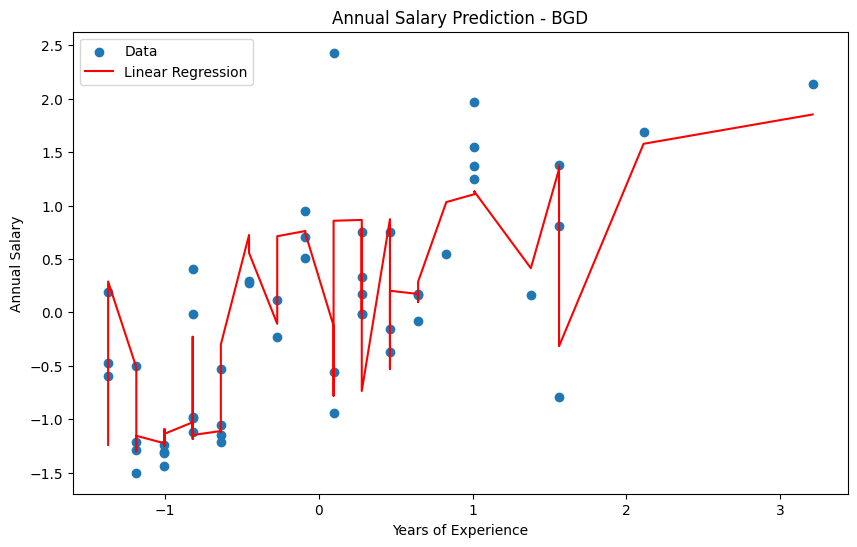

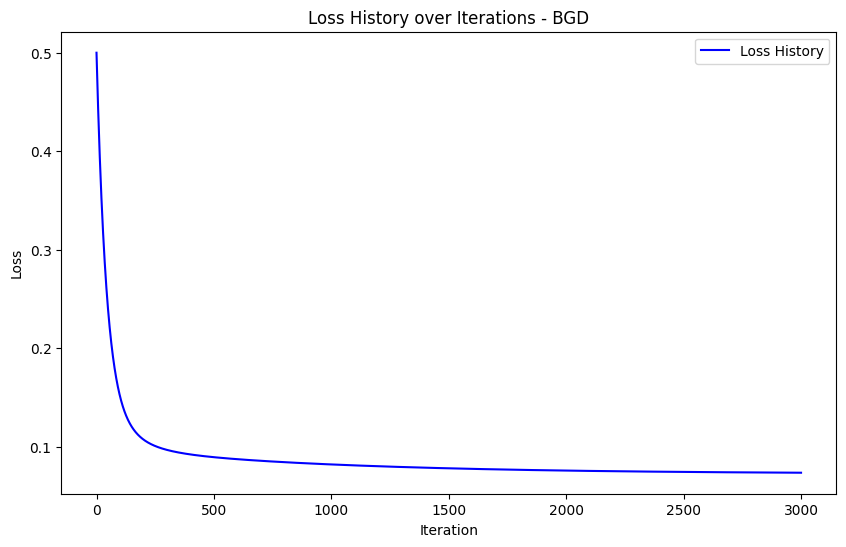

In [16]:
# Data Preparation
theta = np.zeros(5)
alpha = 0.005
maxIterations = 3000

# Calling the function
theta_batch, loss_history_batch = batch_update_2(theta, X, Y, maxIterations, alpha)


# Predictions
predictions_batch = H(theta_batch, X)

# Sorting indices & data & predictions to plot effectively with respect to "Years of Experience"
sorted_indices = np.argsort(X[:, 2])
sorted_X = X[sorted_indices, 2]
sorted_Y = Y[sorted_indices]
sorted_predictions_batch = predictions_batch[sorted_indices]


# Plotting Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(sorted_X, sorted_Y, label="Data")
plt.plot(sorted_X, sorted_predictions_batch, color="red", label="Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary")
plt.title("Annual Salary Prediction - BGD")
plt.legend()
plt.show()

# Plotting Loss History
plt.figure(figsize=(10, 6))
plt.plot(loss_history_batch, '-b', label="Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History over Iterations - BGD")
plt.legend()
plt.show()

1. Annual Salary Prediction - BGD

In the salary prediction graph, the linear regression line seems to capture the overall trend of the data. However, there are noticeable deviations between the predicted values and the actual data points, which might suggest the linear model is fitting too perfectly all the nuances of the dataset. This could be due to several reasons, such as the presence of outlier or the lack of more samples which leads to a overfitting situation.

2. Loss History - BGD

From the loss history graph, we can see a typical convergence pattern of BGD. The loss decreases sharply at the beginning and then plateaus as it approaches the minimum. This is expected behavior for BGD when it is close to the optimal set of parameters.



### Stochastic Gradient Descent applied on Gender-Gap Problem


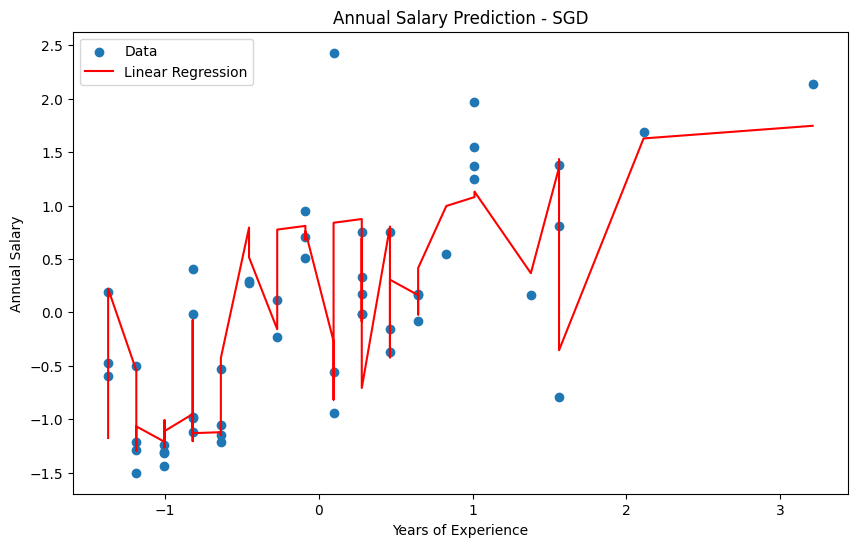

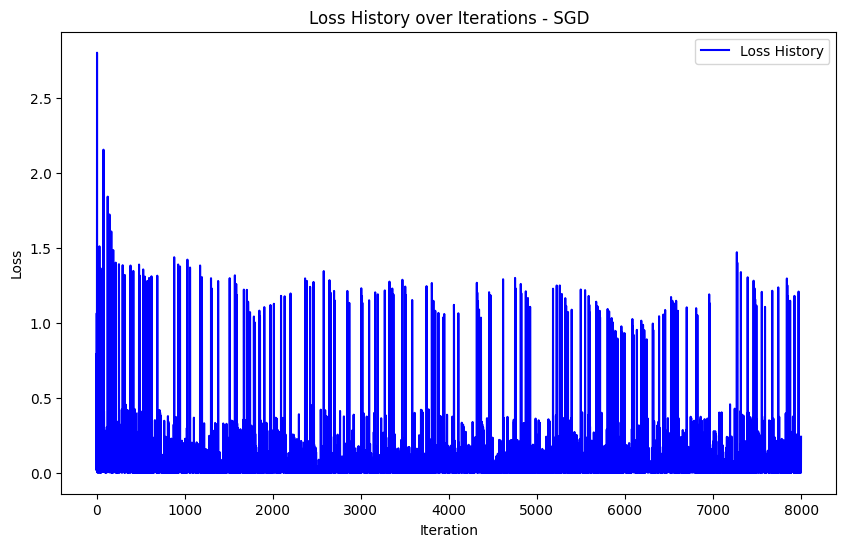

In [17]:
# Data Preparation
theta = np.zeros(5)
alpha = 0.005
maxIterations = 8000

# Function Call
theta_mini, loss_history_mini = stochastic_update_2(theta, X, Y, alpha, maxIterations)

# Predictions
predictions_mini = H(theta_mini, X)

# Sorting indices & data & predictions to plot effectively with respect to "Years of Experience"
sorted_indices = np.argsort(X[:, 2])
sorted_X = X[sorted_indices, 2]
sorted_Y = Y[sorted_indices]
sorted_predictions_mini = predictions_mini[sorted_indices]

# Plotting Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(sorted_X, sorted_Y, label="Data")
plt.plot(sorted_X, sorted_predictions_mini, color="red", label="Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary")
plt.title("Annual Salary Prediction - SGD")
plt.legend()
plt.show()

# Plotting Loss History
plt.figure(figsize=(10, 6))
plt.plot(loss_history_mini, '-b', label="Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History over Iterations - SGD")
plt.legend()
plt.show()


1. Annual Salary Prediction - SGD:

The Annual Salary Prediction top graph with SGD shows more variability in the predictions (the red line) compared to the actual data points (blue dots). This variability is inherent in SGD due to frequent updates with high variance.
The linear regression line for SGD appears to follow the overall trend of the data but with more fluctuations compared to BGD. This is typical because SGD makes updates based on individual data points, which can lead to a noisier convergence path.


2. Loss History over Iterations - SGD:

The bottom graph for SGD shows a loss history that, similar to BGD, decreases sharply at first and then gradually plateaus. However, if we were to zoom in on this graph, we would likely see more fluctuation in the loss values for SGD compared to BGD due to the stochastic nature of the updates.
The convergence for SGD seems to be less smooth than BGD, which is expected. SGD's updates are based on individual samples rather than the entire dataset, which can cause the loss function to bounce around the minimum before settling.
Comparison of Convergence Rates:

BGD generally converges in a more stable and smooth manner, as indicated by the BGD graphs.
SGD, while potentially faster per iteration, often requires more iterations to converge due to the noise in the gradient updates.

## Bonus question - Minibatch update

Implement `stochastic_update(theta, X, Y, alpha, b)`, with `b` the size of the minibatch. Compare convergence rate with batch and stochastic strategies. Conduct an parameter analysis of the minibatch size and analyze the results.

### Mini-Batch Stochastic Gradient Descent applied on Gender-Gap Problem

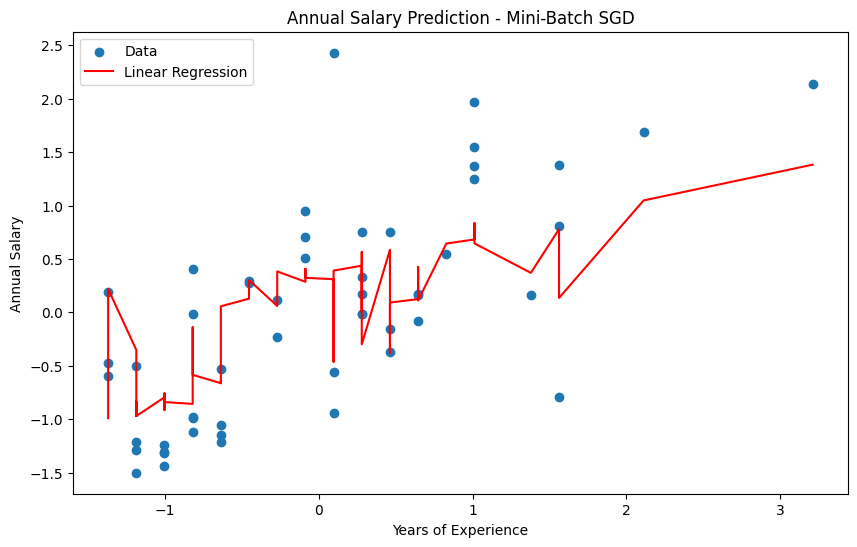

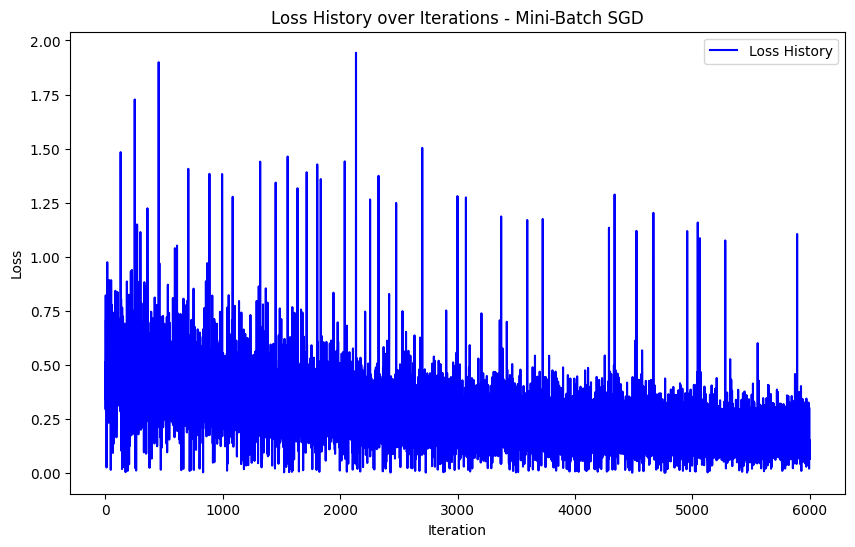

In [18]:
# Mini-Batch Stochastic Gradient Descent
def mini_batch_stochastic_update(theta, X, Y, maxIterations, alpha, batch_size):
    m, n = X.shape
    loss_history = []
    for iteration in range(maxIterations):
        # Random indices positions
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        for i in range(0, m, batch_size):
            Xi = X_shuffled[i:i+batch_size]
            Yi = Y_shuffled[i:i+batch_size]
            predictions = H(theta, Xi)
            errors = predictions - Yi
            gradients = 1/batch_size * Xi.T.dot(errors)
            theta = theta - alpha * gradients
            loss_history.append(L(theta, Xi, Yi))
    return theta, loss_history

# Data Preparation
theta = np.zeros(5)
alpha = 0.0001
maxIterations = 1000
batch_size = 10

# Function Call
theta_mini, loss_history_mini = mini_batch_stochastic_update(theta, X, Y, maxIterations, alpha, batch_size)

# Predictions
predictions_mini = H(theta_mini, X)

# Sorting indices & data & predictions to plot effectively with respect to "Years of Experience"
sorted_indices = np.argsort(X[:, 2])
sorted_X = X[sorted_indices, 2]
sorted_Y = Y[sorted_indices]
sorted_predictions_mini = predictions_mini[sorted_indices]

# Plotting Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(sorted_X, sorted_Y, label="Data")
plt.plot(sorted_X, sorted_predictions_mini, color="red", label="Linear Regression")
plt.xlabel("Years of Experience")
plt.ylabel("Annual Salary")
plt.title("Annual Salary Prediction - Mini-Batch SGD")
plt.legend()
plt.show()

# Plotting Loss History
plt.figure(figsize=(10, 6))
plt.plot(loss_history_mini, '-b', label="Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss History over Iterations - Mini-Batch SGD")
plt.legend()
plt.show()



1. Annual Salary Prediction - Mini-Batch SGD:

The prediction graph shows the regression line plotted against the actual data points. The mini-batch SGD line shows less fluctuation than the pure SGD line, indicating that mini-batch SGD can mitigate some of the variance seen in the full SGD while still being more responsive than full batch gradient descent.
The linear regression line seems to follow the general trend of the data points, but with some deviations, similar to what we saw with the full SGD.

2. Loss History over Iterations - Mini-Batch SGD:

The loss history graph for mini-batch SGD is less noisy compared to the pure SGD loss history but still shows more variance than the full batch gradient descent. The graph still indicates a general trend of decreasing loss, but with noticeable spikes which can be attributed to the inherent noise in mini-batch updates.
Over time, despite the fluctuations, there's a clear downward trend in the loss values, indicating that the model is learning and improving.

{1: {'final_loss': 0.01368336663955815, 'iterations': 52000}, 2: {'final_loss': 0.03654781275086138, 'iterations': 26000}, 4: {'final_loss': 0.09035772740924393, 'iterations': 13000}, 8: {'final_loss': 0.008791297772800915, 'iterations': 7000}, 16: {'final_loss': 0.12649869406582662, 'iterations': 4000}, 52: {'final_loss': 0.10755405019007737, 'iterations': 1000}}


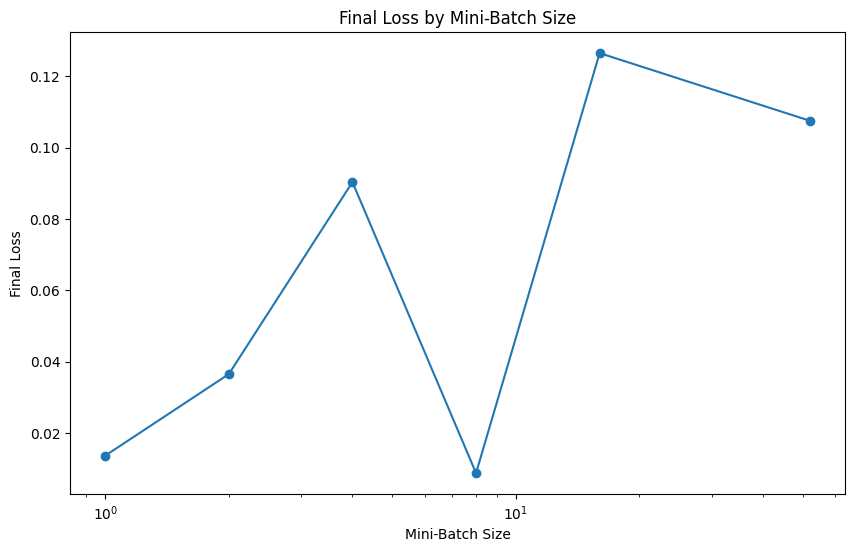

In [19]:
results = {}
batch_sizes = [1, 2, 4, 8, 16, len(Y)]
alpha = 0.001

for batch_size in batch_sizes:
    # Reset theta for each run
    theta = np.zeros(5)  
    theta_mini, loss_history_mini = mini_batch_stochastic_update(theta, X, Y, maxIterations, alpha, batch_size)
    
    # Record the final loss and the number of iterations
    final_loss = loss_history_mini[-1]
    iterations = len(loss_history_mini)
    
    # Store results
    results[batch_size] = {
        'final_loss': final_loss,
        'iterations': iterations,
    }

print(results)
# Plotting final loss by batch size
batch_sizes = list(results.keys())
final_losses = [results[size]['final_loss'] for size in batch_sizes]

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, final_losses, marker='o')
plt.xlabel('Mini-Batch Size')
plt.ylabel('Final Loss')
plt.title('Final Loss by Mini-Batch Size')
plt.xscale('log')  # Use logarithmic scale if batch sizes vary greatly
plt.show()


The graph depicts the relationship between the mini-batch size and the final loss of the mini-batch stochastic gradient descent algorithm. It shows that as the mini-batch size increases, the final loss decreases until a certain point, after which the final loss begins to increase significantly.

This suggests that there is an optimal mini-batch size that minimizes the final loss, and mini-batch sizes larger than this optimal value lead to poorer performance.